In [3]:
# import the packages we are going to need
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from pymatreader import read_mat

/Users/b1064537/anaconda3/lib/python3.6/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [4]:
# load 6 conditions of coherence data (from 1-15 Hz)
data_coh_freq = read_mat('./data/coherence_1_15_Hz.mat')

In [7]:
#Preprocess Coherence Data for lineplot
def preproc_data_brain(file, key):
    
    df = pd.DataFrame(i for i in file[key])
    df.columns = np.arange(1, 15.25, 0.25)
    df['Subject'] = np.arange(1, (np.shape(df)[0] + 1))
    tidy = df.melt(id_vars=['Subject'])
    tidy.rename(columns={'variable': 'Frequency (Hz)', 'value': key}, inplace=True)
    return tidy

In [8]:
novoc = preproc_data_brain(data_coh_freq, 'as_novoc')
chan7 = preproc_data_brain(data_coh_freq, 'as_chan7')
chan5 = preproc_data_brain(data_coh_freq, 'as_chan5')
chan3 = preproc_data_brain(data_coh_freq, 'as_chan3')
chan2 = preproc_data_brain(data_coh_freq, 'as_chan2')
chan1 = preproc_data_brain(data_coh_freq, 'as_chan1')

In [13]:
#append all dataframes
df = pd.concat([novoc, chan7, chan5, chan3, chan2, chan1], axis=1)

#remove duplicate columns
df = df.loc[:,~df.columns.duplicated()]

In [14]:
df_cos = pd.DataFrame({'novoc': df['as_novoc'],
                       'chan7': df['as_chan7'],
                       'chan5': df['as_chan5'],
                       'chan3': df['as_chan3'],
                       'chan2': df['as_chan2'],
                       'chan1': df['as_chan1'],
                       'Subject': df['Subject'],
                       'Frequency (Hz)': df['Frequency (Hz)']
                        })


#Make tidy for plotting
df_tidy = df_cos.melt(['Subject', 'Frequency (Hz)'], var_name='cols', value_name='Coherence')

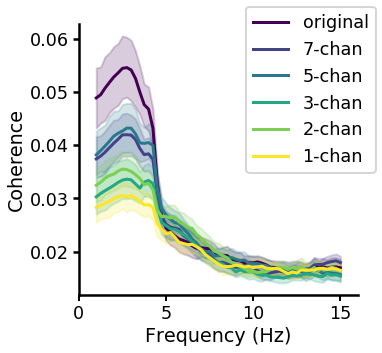

In [15]:
#Do lineplot
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 3, 'xtick.major.width': 2, 
                                              'xtick.major.size': 6, 'ytick.major.size': 6})
ax = sns.lineplot(data=df_tidy,
                 x='Frequency (Hz)',
                 y='Coherence',
                 hue='cols',
                 palette=['#440153', '#404486', '#29788E',  '#21A884', '#79D051', '#FCE625'],
                 ci=95)
sns.despine()
plt.legend(loc=(0.6,0.45), labels=['original', '7-chan', '5-chan', '3-chan', '2-chan', '1-chan']);

#set aspect ratio
plt.xlim(0, 16)
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.figure.set_size_inches(5, 5, forward=True)
ax.figure.savefig("./coh_spectrum_line_1_15Hz_nohp.svg", bbox_inches='tight')